# Chem 30324, Spring 2020, Homework 4

# Due February 18, 2020

### Schr&ouml;dinger developed a wave equation to describe the motion (mechanics) of quantum-scale particles moving in potentials. An electron (mass $m_e$) is moving in a one-dimensional potential given by

$$V(x) = \frac{1}{2} k x^ 2, \quad -\infty < x < \infty$$

### where $k$ is a real number. 

### 1. Write down the time-independent Schrödinger equation for this system. Remember to include the domain of the equation. Indicate the parts of the equation corresponding to the kinetic, potential, and total energies of the system. (*Hint*: Leave your expression in terms of $m_e$ and $k$.)

\begin{equation}
 - \frac{\hbar^{2}}{2m_e} \frac{d^2\psi}{dx^2}\,+ \frac{1}{2}kx^2 \psi= E \psi\quad -\infty < x < \infty
\end{equation}

Kinetic: $$ - \frac{\hbar^{2}}{2m_e} \frac{d^2\psi}{dx^2}\$$

Potential: $$ \frac{1}{2}kx^2 \psi  $$
Total Energy:  $$ E \psi\ $$


### 2. Only one of the three following candidates could be an acceptable wavefunction for this system.  Which one, and why? (In each case, $b=\left ( \hbar^2/m_ek\right )^{1/4}$ is a unit of length, and $a$ is an arbitrary normalization constant.

$$\psi(x) = a \sin(bx) \quad\quad \quad \psi(x)=a \exp\left(-\frac{x^2}{2b^2}\right) \quad\quad \quad \psi(x)= \begin{cases}1-|x|/b, |x|\le b \\ 0, |x|>b \end{cases}$$

The second one is the acceptable wavefunction for this system. The first one is not square integrable. The third one is not differentiable.

### 3. Normalize the "good" wavefunction. You can leave your answer in terms of $b$.  

In [0]:
import sympy as sy
from sympy import *
x=Symbol('x')
a=Symbol('a',positive=True)
b=Symbol('b',positive=True)
Wavefunction=a*exp(-x**2/2/b**2)
A=integrate(Wavefunction**2,(x,-oo,+oo))        # calculate the integral of (wavefunc) * (wavefunc*) from -oo to +oo
Wavefunction_normalized=Wavefunction/sqrt(A)
pprint(Wavefunction_normalized)


    2   
  -x    
  ────  
     2  
  2⋅b   
 ℯ      
────────
4 ___   
╲╱ π ⋅√b


The normalized wavefunction is:

$$ \frac{e^ \frac{-x^2}{2b^2}} {\pi ^ \frac{1} {4} b ^ \frac{1}{2}}$$

### 4. Plot $V(x)$ and your normalized $\tilde{\psi}^2(x)$ along the same $x$ axis. (*Hint*: Plot your answers in units of $b$ length and units of $k$ force constant.)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

exp(-x**2/b**2)/(sqrt(pi)*b)


Text(0.5, 1.0, 'V(x) & Wavefunction2_normalized')

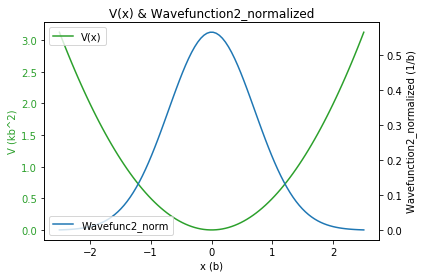

In [0]:
x_d = np.linspace(-2.5,2.5,100) # x_d=x/b which is the dimensionless length 
V=1/2*x_d**2 # in unit of kb^2
# V = 1/2*k*x^2 = 1/2*x_d^2 *k*b^2. 
# Since k and b are constant, we can consider kb^2 to be the unit of energy.

Wavefunction2_normalized=Wavefunction**2/A
print(Wavefunction2_normalized)
Wavefunction2_normalized=np.exp(-x_d**2)/(sqrt(pi)) # in unit of 1/b
#normalized_wavefunction^2 = exp(-x^2/b^2)/sqrt(pi)/b = exp(-x_d**2)/(sqrt(pi))/b
#Since b is constant, we can consider b to be the unit of length.

fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('x (b)')
ax1.set_ylabel('V (kb^2)', color=color)
ax1.plot(x_d, V, color=color, label='V(x)')
ax1.tick_params(axis='y', labelcolor=color)

plt.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Wavefunction2_normalized (1/b)')  # we already handled the x-label with ax1
ax2.plot(x_d, Wavefunction2_normalized,label='Wavefunc2_norm')
plt.legend(loc='lower left')
plt.title('V(x) & Wavefunction2_normalized')

### 5. If you look for this particle, what is the probability you find it in the region $0 < x <b $?

In [42]:
# Analytical solution
Wavefunction2_normalized=Wavefunction**2/A
print(Wavefunction2_normalized)
#normalized_wavefunction^2 = exp(-x^2/b^2)/sqrt(pi)/b = exp(-x_d**2)/(sqrt(pi)*b)

x_d=Symbol('x_d')
b=Symbol('b', positive = True)
Prob=integrate(exp(-x_d**2)/(sqrt(pi)),(x_d,0,1))
float(Prob)

exp(-x**2/b**2)/(sqrt(pi)*b)


0.42135039647485745

Prob = $$\int_{0}^{b}  \frac{e^ \frac{-x^2}{b^2}} { \pi^\frac{1}{2} b}  dx
=\int_{0}^{1}  \frac{e^{-x_d^2}} { \pi^\frac{1}{2}b}  b*dx_d
=\int_{0}^{1}  \frac{e^{-x_d^2}} { \pi^\frac{1}{2}}  dx_d$$ 

### 6. Is your normalized $\tilde{\psi}(x)$ a solution of your Schr&ouml;dinger equation? If so, what is its total energy?  (*Hint*: $\dfrac{d^2}{dx^2}e^{-ax^2} = 2 a e^{-ax^2} \left (2a x^2 -1\right)$. You can leave your answer in terms of fundamental constants.)

In [0]:
m=Symbol('m',positive=True)
b=Symbol('b',positive=True)
h=Symbol('h',positive=True)
k=h**2/b**4/m

x = sy.Symbol('x')
der2 = Wavefunction_normalized.diff(x,2)
E1=(der2*(-h**2)/2/m+1/2*k*x**2*Wavefunction_normalized)/Wavefunction_normalized
E1= simplify(E1) 

if x in E1.free_symbols: # check if E1 is a function of x or not
  print('No. The normalized wavefunction is not a solution of Schrodinger equation.')
else:
  print('Yes. The normalized wavefunction is a solution of Schrodinger equation.')
  print('The total energy is', E1)

Yes. The normalized wavefunction is a solution of Schrodinger equation
The total energy is h**2/(2*b**2*m)


### 7. Is your normalized $\tilde{\psi}(x)$ an eigenfunction of the linear momentum operator? If so, what is its eigenvalue?

In [0]:
import numpy as np
der1 = Wavefunction_normalized.diff(x,1)
Eigenvalue=complex(0,-1)*h*der1/Wavefunction_normalized

if x in Eigenvalue.free_symbols: # check if Eigenvalue is a function of x or not
  print('No. It is not an eigenfunction of the linear momentum operator.')
else:
  print('Yes. It is an eigenfunction of the linear momentum operator.')


No. It is not an eigenfunction of the linear momentum operator.
It is not an eigenfunction of the linear momentum operator.


### 8. If you were to measure the linear momentum of many electrons, all with the same wavefunction $\tilde{\psi}(x)$ , will you get the same answer every time?   

In [0]:
# Not a eigenfunction
print('No. Because this wavefunction is not an eigenfunction of momentum.') 
print('Only the eigenfunction of momentum can give us a single result.')

No. Because this wavefunction is not an eigenfunction of momentum.
Only the eigenfunction of momentum can give us a single result.


### 9. If you were to measure the linear momentum of many electrons, all with the same wavefunction $\tilde{\psi}(x)$ , what will you get on average?

In [0]:
# Momentum operator
der1 = Wavefunction_normalized.diff(x,1)
P1 = complex(0,-1)*h*der1 # First momentum operator 
Ep_p= integrate(P1*Wavefunction_normalized,(x,-oo,+oo))
print('Expectation value is equal to ', Ep_p)

Expectation value is equal to  0


### 9. What is the *uncertainty* in the momentum of the electron? (Recall the uncertainty is given by $\Delta p = \sqrt{\langle p^2 \rangle - \langle p \rangle^2}$.)  You can give your answer in units of $m_e$, $\hbar$, and $b$.

In [0]:
# Momentum operator^2
der2 = Wavefunction_normalized.diff(x,2)
Ep_p2= integrate(-h**2*der2*Wavefunction_normalized,(x,-oo,+oo))
dp=sqrt(Ep_p2-Ep_p*2)
print('The uncertainty in the momentum of the electron is ' ,dp)

The uncertainty in the momentum of the electron is  sqrt(2)*h/(2*b)


### 10. What is the maximum precision with which you could measure the position of the electron? Give your answer in units of $b$.

In [0]:
dx=h/2/dp
print('The maximum precision with the position of the electron is ',dx)

The maximum precision with the position of the electron is  sqrt(2)*b/2


### 11. You probably recognize $V(x)$ as the potential for a harmonic oscillator, and you remember that a classic harmonic oscillator always oscillates within some amplitude $A$. Look at $\tilde{\psi}(x)$. Does it go to zero at some $A$?  Or is it non-zero all the way to infinity?

exp(-x**2/(2*b**2))/(pi**(1/4)*sqrt(b))
It is non-zero all the way to infinity as long as A is a finite value. 


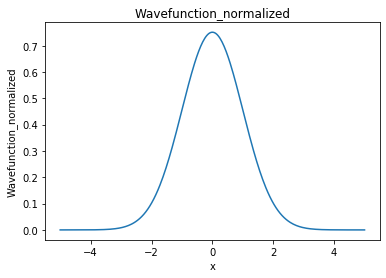

In [0]:
x = np.linspace(-5,5,300)

Wavefunction_normalized=Wavefunction/sqrt(A)
print(Wavefunction_normalized)

b=1
Wavefunction_normalized=np.exp(-x**2/(2*b**2))/(pi**(1/4)*sqrt(b))

plt.plot(x,Wavefunction_normalized)
plt.xlabel('x')
plt.ylabel('Wavefunction_normalized')
plt.title('Wavefunction_normalized')

print('It is non-zero all the way to infinity as long as A is a finite value. ')